In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from matplotlib.ticker import FuncFormatter
import time
from datetime import datetime
import matplotlib.dates as mdates
import linecache
from iminuit import Minuit 
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from Laura import *
from calculations import *

In [2]:
#Read CPC data 

parent = '../../Lund/CPC' 
names = ['test1_CPC', 'test2_CPC', 'test3_CPC', 'test4_CPC', 'test5_CPC', 'test6_CPC', 'test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC', 'test11_CPC']

data_CPC = read_CPC(parent) 

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: C

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in leg

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

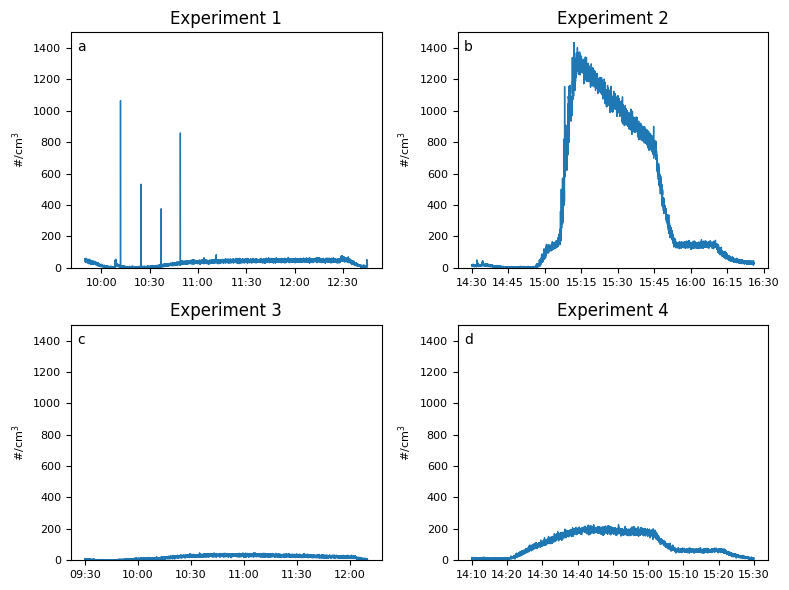

In [3]:
# Plot CPC timeseries

Timestamps_CPC = [['09:50:00', '12:50:00'],
                  ['14:30:00', '16:30:00'],
                  ['09:30:00', '12:10:00'],
                  ['14:10:00', '15:30:00']] 

CPC_dict_keys = ['test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC'] 


fig, axes = plt.subplots(2, 2, figsize = (8, 6))

for i, key in enumerate(CPC_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]



    plot_LCS_single(ax, data_CPC, CPC_dict_keys[i], Timestamps_CPC[i][0], Timestamps_CPC[i][1], data_CPC['test7_CPC'].keys()[1], '#/cm$^3$', 'Time', None)

    ax.set_ylim(0, 1500)
    
    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Timeseries_CPC.png', dpi = 600)


In [4]:
# Mean conc for CPC

timestamps_exp = np.array([['10:45:00', '12:26:00'],
                  ['15:00:00', '15:34:00'],
                  ['10:20:00', '12:00:00'],
                  ['14:30:00', '15:00:00']], dtype = object)


dm_nørreport = get_mean_conc(data_CPC, ['test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC'], 'Time', timestamps_exp,  data_CPC['test10_CPC'].keys()[1], 'CPC_mean_conc.csv')
display(dm_nørreport)

[ 4343. 10403.]
[3887. 5927.]
[3577. 9577.]
[4319. 6119.]


,test7_CPC time start,test7_CPC time end,test7_CPC,test8_CPC time start,test8_CPC time end,test8_CPC,test9_CPC time start,test9_CPC time end,test9_CPC,test10_CPC time start,test10_CPC time end,test10_CPC
0,2024-11-12 10:45:00,2024-11-12 12:26:00,42.491914,2024-11-12 15:00:00,2024-11-12 15:34:00,893.570588,2024-11-12 10:20:00,2024-11-12 12:00:00,27.960833,2024-11-12 14:30:00,2024-11-12 15:00:00,174.663333


In [6]:
# read LCS data: KU 

parent = '../../Lund/LCS_vores' 
names = ['DG-0051', 'DG-0049']

data_LCS_KU = read_LCS_KU_data(parent, 'timestamp', names) 

,Unnamed: 0,timestamp,ALEC1_AE1,ALEC1_AE2,ALEC1_WE1,ALEC1_WE2,ALEC3_AE1,ALEC3_AE2,ALEC3_WE1,ALEC3_WE2,...,SPS30_PM2.5,SPS30_PM4,VEML6040_AL,VEML6040_Blue,VEML6040_ColorTemp,VEML6040_Green,VEML6040_RED,VEML6040_White,continuousMessages,dTS_RC_Cli
0,0,2024-10-15 11:04:58,3.283648,0.567567,0.000000,0.610387,0.181641,0.130123,0.121311,0.000000,...,0.561652,0.602805,13.050659,102,31587,397,437,695,0,7761
1,1,2024-10-15 11:05:58,3.271388,0.567705,0.000000,0.610578,0.753355,0.593277,0.752508,0.093710,...,0.464716,0.496257,8.876379,82,30935,270,377,578,1,8814
2,2,2024-10-15 11:06:58,3.278897,0.567456,0.000000,0.610852,0.947474,0.802077,0.955532,0.699753,...,0.709712,0.759883,12.825194,103,28054,394,434,691,2,7580
3,3,2024-10-15 11:07:59,3.279111,0.567578,0.302226,0.611027,1.042340,0.918224,1.041517,0.912444,...,0.572312,0.607894,12.792569,103,30312,394,433,691,3,6704
4,4,2024-10-15 11:08:59,3.278985,0.567735,0.653288,0.611163,1.099538,0.995636,1.092064,1.009554,...,0.359997,0.381048,12.804220,103,28786,394,434,690,4,7811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,3084,2024-10-17 15:34:20.000,1.496098,0.558079,0.651564,0.581178,1.397521,1.399187,1.398119,1.401134,...,1.648612,2.244748,12.209339,103,56966,379,419,672,229,7660
3085,3085,2024-10-17 15:35:20.000,1.522829,0.558175,0.679394,0.580661,1.398248,1.400414,1.398891,1.402144,...,1.568437,2.082943,12.410387,101,35722,380,419,675,230,7891
3086,3086,2024-10-17 15:36:20.000,1.464449,0.558708,0.618389,0.580842,1.395503,1.397209,1.396997,1.399190,...,1.702502,2.185059,12.153571,102,40950,377,419,669,231,7357
3087,3087,2024-10-17 15:37:20.000,1.489320,0.558873,0.645569,0.579751,1.396669,1.398762,1.398844,1.401223,...,1.478500,1.848343,8.970390,85,43978,273,373,582,232,7409


ValueError: time data "2024-10-15 11:04:58" doesn't match format "%Y-%m-%d %H:%M:%S.%f", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [21]:
# read LCS data: OPC5000

parent = '../../Lund/LCS_vores' 
names = ['LCS109_2024-10-14', 'LCS109_2024-10-15', 'LCS109_2024-10-16', 'LCS109_2024-10-17']

data_LCS_OPC500 = read_LCS_data_OPC5000(parent, 'timestamp', names, ',') 

In [22]:
# Read LCS data: Lund 

parent = '../../Lund/LCS_vores' 
names = ['LC_20241015', 'LC_20241016', 'LC_20241017']

data_LCS_LUND = read_LCS_data_LUND(parent, 'Timestamp', names) 

An error occurred while processing LC_20241015.xlsx: 'str' object has no attribute 'unique'
An error occurred while processing LC_20241016.xlsx: 'str' object has no attribute 'unique'
An error occurred while processing LC_20241017.xlsx: 'str' object has no attribute 'unique'


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
C:\Users\45404\AppData\Local\Temp\ipykernel_21700\1497316228.py:17: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax, data_LCS_KU, 'DG-0049', Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_21700\1497316228.py:18: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_sin

NameError: name 'data_LCS_KU' is not defined

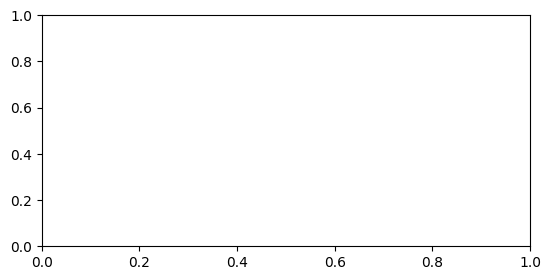

In [26]:
Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_KU_keys =['DG-0049', 'DG-0051']

for i, key in enumerate(LCS_KU_keys): 
    exp_number = str(i+1)
    fig_name = 'LCS_KU_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

# For 0049 sensor

    plot_LCS_single(ax, data_LCS_KU, 'DG-0049', Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, 'DG-0049', Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, 'DG-0049', Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, 'DG-0049', Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, 'DG-0049', Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, 'DG-0049', Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:64: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('LDSA / $\mu$m$^{2}$/cm$^{3}$', color = p2.get_color(), fontsize = 9)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:83: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Concentration / $\mu$g/m$^{3}$', fontsize = 9)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:129: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax[i], data_dict, 'LCS0076', st, end_time[i], 'SPS30_PM2.5', 'PM$_{2.5}$ / $\mu$g/m$^{3}$')
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:130: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax[i], data_dict, 'LCS0104', st, end_time[i], 'SPS30_PM2.5', 'PM$_{2.5}$ / $\mu$g/m$^{3}$')
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:131: SyntaxWarning: inval

KeyError: 'Particulate_ conc_PN01um_PN05um'

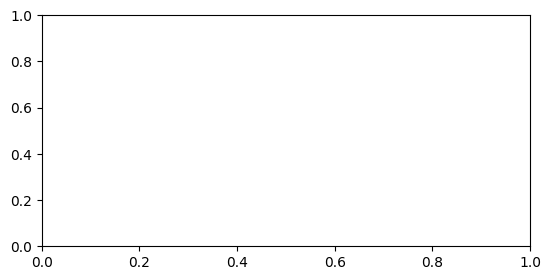

In [13]:
Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = [['Particulate_ conc_PN01um_PN05um', 'Particulate_ conc_PN01um_PN05um', 'Particulate_ conc_PN01um_PN05um', 'Particulate_ conc_PN01um_PN05um'],
                 ['Particulate_conc_PN1um_PN25um', 'Particulate_conc_PN1um_PN25um','Particulate_conc_PN1um_PN25um','Particulate_conc_PN1um_PN25um'],
                 ['Particulate_conc_PN5_PN10um', 'Particulate_conc_PN5_PN10um', 'Particulate_conc_PN5_PN10um','Particulate_conc_PN5_PN10um']]

for i, key in enumerate(LCS_dict_keys[0]): 
    exp_number = str(i+1)
    fig_name = 'LCS_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

# For 0049 sensor

    plot_LCS_single(ax, data_LCS_KU, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN0.3', '#/cm$^3$', 'Timestamp', '0.3')
    plot_LCS_single(ax, data_LCS_KU, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN0.5', '#/cm$^3$', 'Timestamp', '0.5')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN1', '#/cm$^3$', 'Timestamp', '1')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN2.5', '#/cm$^3$', 'Timestamp', '2.5')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN1', '#/cm$^3$', 'Timestamp', '1')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN2.5', '#/cm$^3$', 'Timestamp', '2.5')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[2][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN5', '#/cm$^3$', 'Timestamp', '5')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[2][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0049 PN10', '#/cm$^3$', 'Timestamp',)

# For 0051 sensor 


    plot_LCS_single(ax, data_LCS_KU, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN0.3', '#/cm$^3$', 'Timestamp')
    plot_LCS_single(ax, data_LCS_KU, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN0.5', '#/cm$^3$', 'Timestamp')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN1', '#/cm$^3$', 'Timestamp')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN2.5', '#/cm$^3$', 'Timestamp')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN1', '#/cm$^3$', 'Timestamp')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[1][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN2.5', '#/cm$^3$', 'Timestamp')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[2][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN5', '#/cm$^3$', 'Timestamp')
    plot_LCS_single(ax, data_LCS_KU, LCS_dict_keys[2][i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'DG-0051 PN10', '#/cm$^3$', 'Timestamp')

    fig.savefig(fig_name, dpi = 600)

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\45404\AppData\Local\Temp\ipykernel_17028\4201619741.py:19: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_17028\4201619741.py:20: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_singl

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

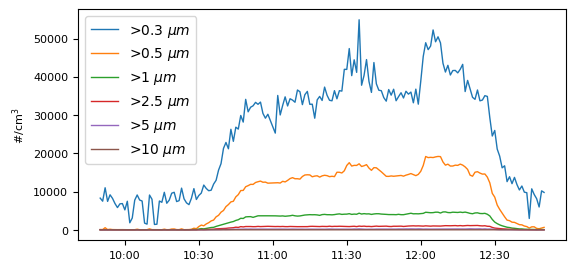

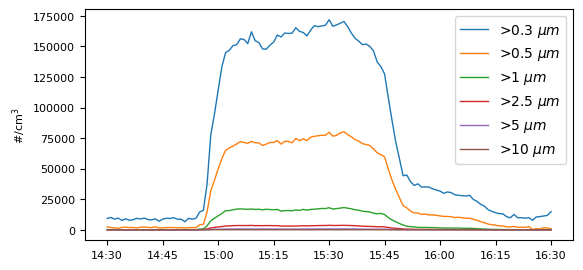

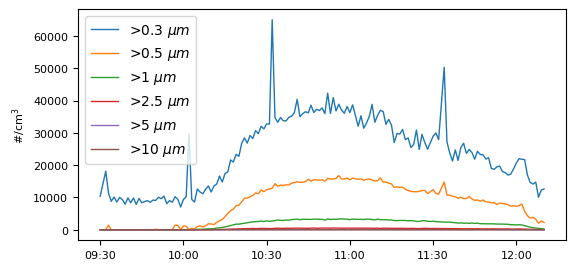

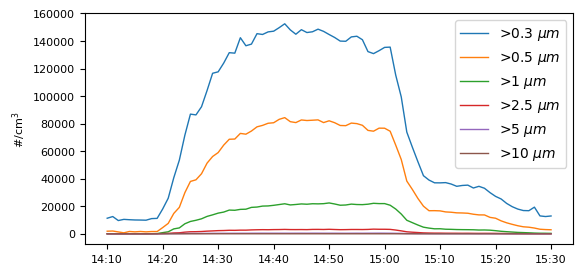

In [26]:
# plot LCS data: OPC500

Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['LCS109_2024-10-16', 'LCS109_2024-10-16','LCS109_2024-10-17','LCS109_2024-10-17'] 

for i, key in enumerate(LCS_dict_keys): 
    exp_number = str(i+1)
    fig_name = 'LCS_OPC500_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

# For 109 sensor

    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



    fig.savefig(fig_name, dpi = 600)



In [12]:
display(data_LCS_LUND.keys())

dict_keys(['DG-0070', 'DG-0071', 'DG-0073', 'DG-0074', 'DG-0076', 'DG-0078', 'DG-0080', 'DG-0081', 'DG-0082', 'DG-0083', 'DG-0085', 'DG-0072', 'DG-0077', 'DG-0075'])

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:64: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('LDSA / $\mu$m$^{2}$/cm$^{3}$', color = p2.get_color(), fontsize = 9)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:83: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Concentration / $\mu$g/m$^{3}$', fontsize = 9)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:129: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax[i], data_dict, 'LCS0076', st, end_time[i], 'SPS30_PM2.5', 'PM$_{2.5}$ / $\mu$g/m$^{3}$')
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:130: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax[i], data_dict, 'LCS0104', st, end_time[i], 'SPS30_PM2.5', 'PM$_{2.5}$ / $\mu$g/m$^{3}$')
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:131: SyntaxWarning: inval

KeyError: 'DG-0072'

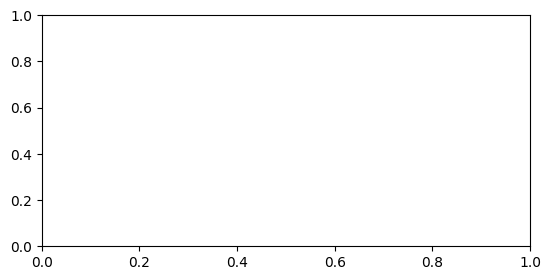

In [10]:
# Plot LCS data: Lund 

Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['DG-0072', 'DG-0085','DG-0077']

for i in range(4): 
    exp_number = str(i+1)
    fig_name = 'LCS_LUND_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))



    plot_LCS_single(ax, data_LCS_LUND, LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN2.5, #/cm3', '#/cm$^3$', 'Timestamp', LCS_dict_keys[0])
    plot_LCS_single(ax, data_LCS_LUND, LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN2.5, #/cm3', '#/cm$^3$', 'Timestamp', LCS_dict_keys[1])
    plot_LCS_single(ax, data_LCS_LUND, LCS_dict_keys[2], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN2.5, #/cm3', '#/cm$^3$', 'Timestamp', LCS_dict_keys[2])
    # plot_LCS_single(ax, data_LCS_LUND, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM1, ug/m3', '#/cm$^3$', 'timestamp')
    # plot_LCS_single(ax, data_LCS_LUND, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM2.5, ug/m3', '#/cm$^3$', 'timestamp')
    # plot_LCS_single(ax, data_LCS_LUND, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM4, ug/m3', '#/cm$^3$', 'timestamp')
    # plot_LCS_single(ax, data_LCS_LUND, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM10, ug/m3', '#/cm$^3$', 'timestamp')



    # fig.savefig(fig_name, dpi = 600)


In [11]:
display(data_LCS_LUND.keys())

dict_keys([])

In [11]:
# Opret en ny dictionary med indeks som nøgler
data_LCS_LUND_indexed = {i: data_LCS_LUND[sensor] for i, sensor in enumerate(data_LCS_LUND)}

# Display for at kontrollere, hvordan dataene ser ud med indeks
for idx, data in data_LCS_LUND_indexed.items():
    print(f"Index: {idx}, Sensor Data:\n", data)

Index: 0, Sensor Data:
 [            Timestamp Entity Name  CO, ppm    CO2, ppm     CO_AE     CO_WE  \
0    15/10/2024 09:00     DG-0070   0.3942  538.363647  1.431777  1.278397   
1    15/10/2024 09:01     DG-0070   0.3566  537.181946  1.432252  1.293489   
2    15/10/2024 09:02     DG-0070   0.3565  534.909058  1.431712  1.292985   
3    15/10/2024 09:03     DG-0070   0.4136  532.666626  1.430316  1.269401   
4    15/10/2024 09:04     DG-0070   0.5019  532.666687  1.430066  1.234761   
..                ...         ...      ...         ...       ...       ...   
457  15/10/2024 16:55     DG-0070   0.1958  454.272736  1.444752  1.368580   
458  15/10/2024 16:56     DG-0070   0.1974  454.777771  1.445856  1.369043   
459  15/10/2024 16:57     DG-0070   0.1879  456.545441  1.445393  1.372291   
460  15/10/2024 16:58     DG-0070   0.1905  454.090912  1.445765  1.371642   
461  15/10/2024 16:59     DG-0070   0.1986  453.727295  1.444859  1.367577   

           LAT       LON  NO2, ppb    

In [15]:
display(data_LCS_LUND_indexed.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])